In [1]:
# Imports

import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tabulate import tabulate
import seaborn as sns
import math

## Data Loading

In [2]:
df = pd.read_csv('../data/okcupid_profiles.csv')
df.head()

,age,status,sex,orientation,body_type,diet,drinks,drugs,education,ethnicity,...,essay0,essay1,essay2,essay3,essay4,essay5,essay6,essay7,essay8,essay9
0,22,single,m,straight,a little extra,strictly anything,socially,never,working on college/university,"asian, white",...,about me: i would love to think that i was so...,currently working as an international agent fo...,making people laugh. ranting about a good salt...,"the way i look. i am a six foot half asian, ha...","books: absurdistan, the republic, of mice and ...",food. water. cell phone. shelter.,duality and humorous things,trying to find someone to hang out with. i am ...,i am new to california and looking for someone...,you want to be swept off your feet! you are ti...
1,35,single,m,straight,average,mostly other,often,sometimes,working on space camp,white,...,i am a chef: this is what that means. 1. i am ...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,i am die hard christopher moore fan. i don't r...,delicious porkness in all of its glories. my b...,NaN,NaN,i am very open and will share just about anyth...,NaN
2,38,available,m,straight,thin,anything,socially,NaN,graduated from masters program,NaN,...,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,okay this is where the cultural matrix gets so...,movement conversation creation contemplation t...,NaN,viewing. listening. dancing. talking. drinking...,"when i was five years old, i was known as ""the...","you are bright, open, intense, silly, ironic, ..."
3,23,single,m,straight,thin,vegetarian,socially,NaN,working on college/university,white,...,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,"bataille, celine, beckett. . . lynch, jarmusch...",NaN,cats and german philosophy,NaN,NaN,you feel so inclined.
4,29,single,m,straight,athletic,NaN,socially,never,graduated from college/university,"asian, black, other",...,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at: http://bagsbrown....,i smile a lot and my inquisitive nature,"music: bands, rappers, musicians at the moment...",NaN,NaN,NaN,NaN,NaN


## Basic Data Info

In [3]:
print("Number of records:", df.shape[0])
print("Number of variables:", df.shape[1],'\n')

dfDetails = []
for i, column in enumerate(df.columns):
    dfDetails.append([column, len(pd.unique(df[column].values)), np.sum(pd.isnull(df[column]))])
    
# df = df.dropna()
print(tabulate(dfDetails, headers=['Variable','Unique entries count', 'Null entries count']),"\n")
print("Number of records with no missing entries:", df.dropna().shape[0],'\n')

Number of records: 59946
Number of variables: 31 

Variable       Unique entries count    Null entries count
-----------  ----------------------  --------------------
age                              54                     0
status                            5                     0
sex                               2                     0
orientation                       3                     0
body_type                        13                  5296
diet                             19                 24395
drinks                            7                  2985
drugs                             4                 14080
education                        33                  6628
ethnicity                       218                  5680
height                           61                     3
income                           13                     0
job                              22                  8198
last_online                   30123                     0
location             

### Missing entries

In [4]:
total_count = df.isna().count()
count_na = df.isna().sum().sort_values(ascending = False)
pct_na =(df.isna().sum()/total_count).sort_values(ascending = False)
pd.options.display.float_format = '{:.1%}'.format
missing_data = pd.concat([count_na, pct_na], axis=1, keys=['Count', 'Percent'])
# Only show columns with more than 5% missing data
missing_data[missing_data['Percent']>=0.05].head(20)

,Count,Percent
offspring,35561,59.3%
diet,24395,40.7%
religion,20226,33.7%
pets,19921,33.2%
essay8,19225,32.1%
drugs,14080,23.5%
essay6,13771,23.0%
essay9,12603,21.0%
essay7,12451,20.8%
essay3,11476,19.1%


### Preliminary Analysis and Visualization

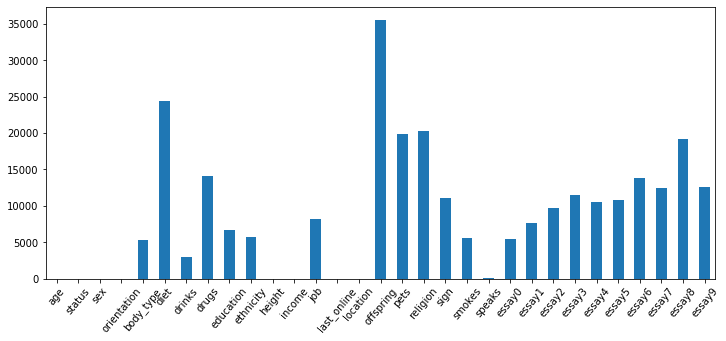

In [5]:
plt.figure(figsize=(12, 5))
df.isna().sum().plot(kind="bar")
plt.xticks(rotation=50)
plt.show()

In [6]:
print(df['sex'].value_counts())
print(df['ethnicity'].value_counts().sort_values(ascending=False)[:5])

m    35829
f    24117
Name: sex, dtype: int64
white               32831
asian                6134
hispanic / latin     2823
black                2008
other                1706
Name: ethnicity, dtype: int64


In [7]:
df.body_type.unique()

array(['a little extra', 'average', 'thin', 'athletic', 'fit', nan,
       'skinny', 'curvy', 'full figured', 'jacked', 'rather not say',
       'used up', 'overweight'], dtype=object)

In [8]:
print('body_type:')
print(list(df['body_type'].unique()), end='\n\n')
print('diet:')
print(list(df['diet'].unique()), end='\n\n')
print('Religion:')
print(list(df['religion'].unique()), end='\n\n')

body_type:
['a little extra', 'average', 'thin', 'athletic', 'fit', nan, 'skinny', 'curvy', 'full figured', 'jacked', 'rather not say', 'used up', 'overweight']

diet:
['strictly anything', 'mostly other', 'anything', 'vegetarian', nan, 'mostly anything', 'mostly vegetarian', 'strictly vegan', 'strictly vegetarian', 'mostly vegan', 'strictly other', 'mostly halal', 'other', 'vegan', 'mostly kosher', 'strictly halal', 'halal', 'strictly kosher', 'kosher']

Religion:
['agnosticism and very serious about it', 'agnosticism but not too serious about it', nan, 'atheism', 'christianity', 'christianity but not too serious about it', 'atheism and laughing about it', 'christianity and very serious about it', 'other', 'catholicism', 'catholicism but not too serious about it', 'catholicism and somewhat serious about it', 'agnosticism and somewhat serious about it', 'catholicism and laughing about it', 'agnosticism and laughing about it', 'agnosticism', 'atheism and somewhat serious about it', 'bud

In [9]:
# Check unique values
print('body_type:')
list(set(df['body_type']))

body_type:


[nan,
 'a little extra',
 'athletic',
 'fit',
 'used up',
 'average',
 'full figured',
 'thin',
 'curvy',
 'overweight',
 'skinny',
 'jacked',
 'rather not say']

<Figure size 1080x504 with 0 Axes>

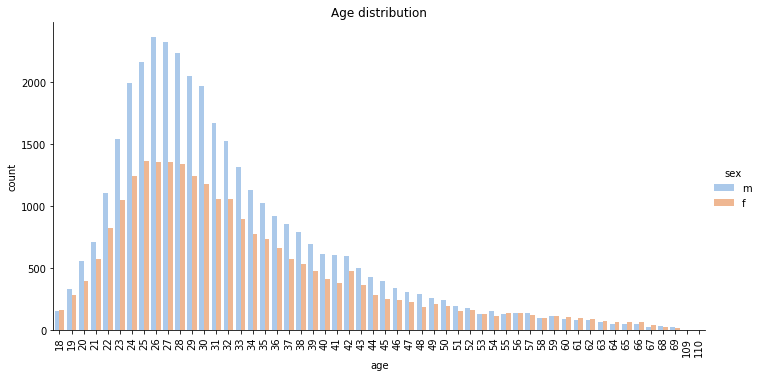

In [10]:
plt.figure(figsize=(15, 7))
sns.catplot(x='age', data = df, kind='count', palette='pastel', hue='sex', 
            height=5, # make the plot 5 units high
            aspect=2)
plt.xticks(rotation = 90)
plt.title('Age distribution')
plt.show()

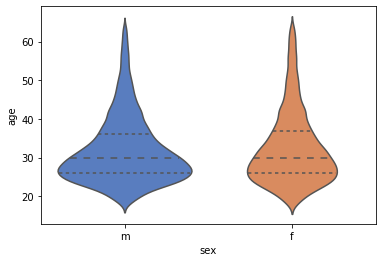

In [11]:
profile_age = df[df['age']<65]
ax = sns.violinplot(x='sex', y='age',data=profile_age,
                    palette="muted", split=True, 
                    scale="count", inner="quartile")

In [12]:
# Define a function to show pentages on catplot
def show_percentage(plot, feature):
    total = len(feature)
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x()+p.get_width()/2-0.1
        y = p.get_y()+p.get_height()
        ax.annotate(percentage, (x, y), size=10)

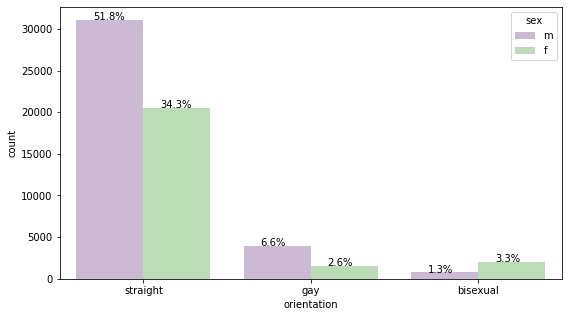

In [13]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='orientation', data=df, 
                   hue='sex', 
                   palette='PRGn',
                   order=df['orientation'].value_counts().iloc[:10].index) 
total = float(len(df))
show_percentage(ax, df)
plt.show()

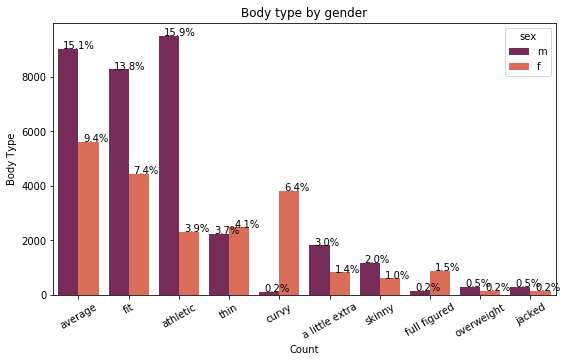

In [14]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='body_type', data=df, 
                   hue='sex', 
                   palette='rocket',
                   order=df['body_type'].value_counts().iloc[:10].index)
ax.set_title("Body type by gender")
ax.set(xlabel='Count', ylabel='Body Type') 
plt.xticks(rotation = 30)
show_percentage(ax, df)
plt.show()

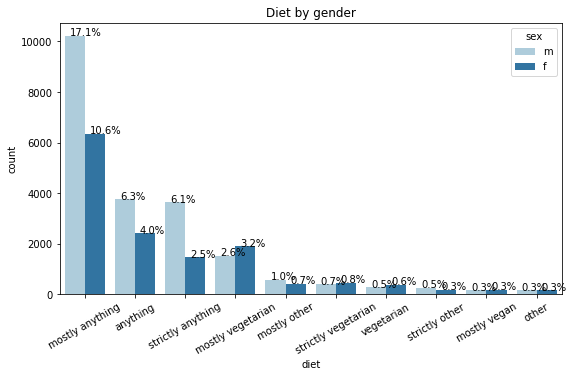

In [15]:
plt.figure(figsize=(9, 5))
ax = sns.countplot(x='diet', data=df, 
                   hue='sex', palette='Paired',
                   order = df['diet'].value_counts().iloc[:10].index) 
plt.xticks(rotation = 30)
ax.set_title("Diet by gender")
show_percentage(ax, df)

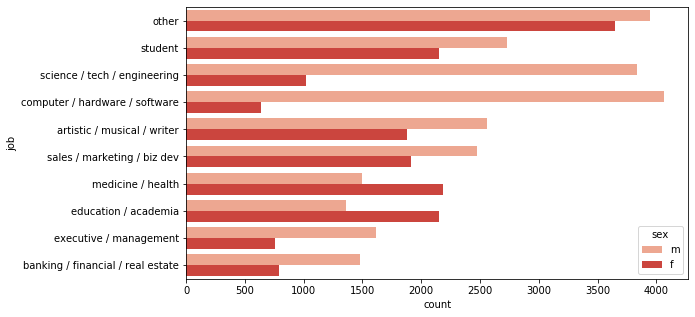

In [16]:
plt.figure(figsize=(9, 5))
sns.countplot(y='job', data=df, 
              hue='sex', palette='Reds',
              order = df['job'].value_counts().iloc[:10].index)
plt.show()

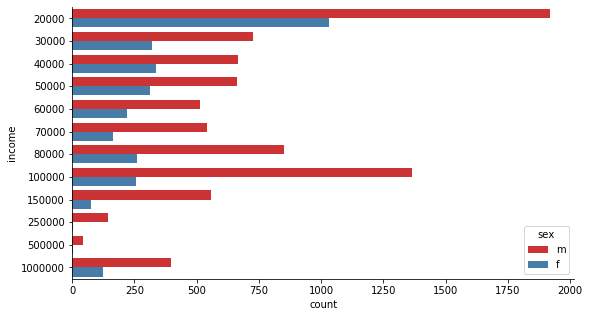

In [17]:
# Remove invalid data
plt.figure(figsize=(9, 5))
df_income = df[df.income != -1]
sns.countplot(y='income', data=df_income, hue='sex', palette='Set1')
sns.despine() # Removes the spines from the right and upper portion of the plot
plt.show()

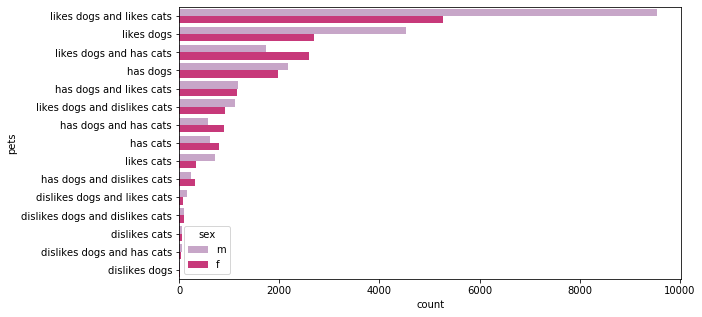

In [18]:
plt.figure(figsize=(9, 5))
sns.countplot(y = 'pets', data=df, 
              hue='sex', palette='PuRd',
              order=df['pets'].value_counts().iloc[:].index)
plt.show()

In [19]:
dfMales, dfFemales = df[df['sex']=='m'], df[df['sex']=='f']
print(dfMales.shape[0], dfFemales.shape[0])

35829 24117


#### Filtering and cleaning database for recommendation

In [20]:
# Dropping features not to be utilized by the recommendation engine
df = df.drop(columns=['ethnicity', 'height', 'income', 'job', 'offspring', 'speaks', 'last_online'])

In [21]:
# keep only available people in the recommendation database
df = df[df.status.isin(['single', 'available'])].drop(columns='status')

In [22]:
# remove locations with less than 5 people as we plan to return top 5 people
# so for places with less than 5, there is not much point to recommendation

loc_counts = df.location.value_counts()
remove_locs = list(loc_counts[loc_counts < 5].index)
df = df[~df.location.isin(remove_locs)]

In [23]:
df.pets = df.pets.apply(lambda x: x.replace('has', 'likes') if isinstance(x, str) else x)

In [24]:
df = df[df.isnull().sum(axis=1) <= 5] # remove profiles with excessive null entries

### Split and save processed data

In [25]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=0.4, random_state=123)

In [26]:
df_train.to_csv('../data/train.csv')
df_test.to_csv('../data/test.csv')